# Job Number Analysis

In [1]:
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run utils.ipynb

## Load data

In [2]:
path = 'D:/Learn/projects/data/job_data/apify'
date = '01152025'
type = 'fin'
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_salary.csv')
print(df.shape)
df.head()

(661, 29)


,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,NaN,200000.0,250000.0,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN,NaN,225000.0
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN,NaN,183250.0
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN,NaN,NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,190000.0,210000.0,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN,NaN,200000.0
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN,NaN,150500.0


### Stats and trend of job numbers

In [3]:
# percentage of each job title
title_ratio = df.groupby('simplified_job_title').size().reset_index(name='count')

# plot a pie chart to show the percentage
plt.pie(title_ratio['count'], labels=title_ratio['simplified_job_title'], autopct='%1.1f%%', labeldistance=1.1, pctdistance=0.85, startangle=90)
plt.axis('equal')
plt.title('Percentage of Job Title')
plt.savefig("job_num_pie.png", dpi=300, bbox_inches="tight")
plt.show()

KeyError: 'simplified_job_title'

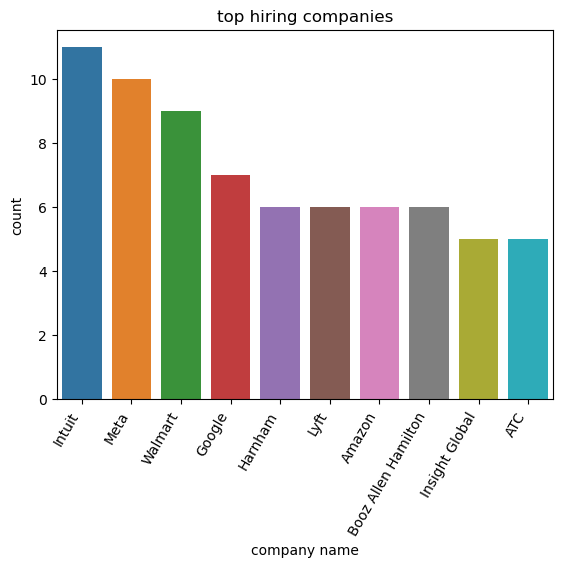

In [6]:
# top hiring companies
sorted_hiring_company = df.groupby('companyName').size().reset_index(name='count')
sorted_hiring_company = sorted_hiring_company.sort_values(by='count', ascending=False).head(10)
ax = sns.barplot(data=sorted_hiring_company, x='companyName', y='count', hue='companyName')
# plt.title('top hiring companies')
# plt.xticks(rotation=45)
format_plot(ax, title='top hiring companies', xlabel='company name')
plt.savefig("job_top_companies.png", dpi=300, bbox_inches="tight")
plt.show()

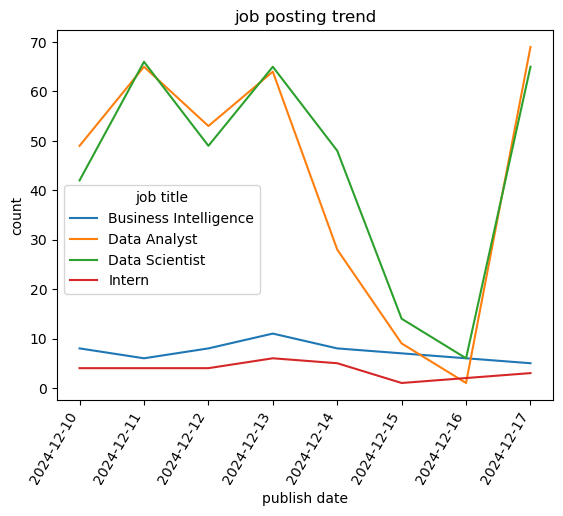

In [ ]:
# count job postings by date
jobs_over_time = df.groupby(['publishedAt', 'simplified_job_title']).size().reset_index(name='count')

# plot lineplot of the postings
ax = sns.lineplot(data=jobs_over_time, x='publishedAt', hue='simplified_job_title', y='count')
format_plot(ax, title='job posting trend', xlabel='publish date')
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.6), title="job title")
plt.savefig("job_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
df2 = df.copy()
# convert publishedAt to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df.info()

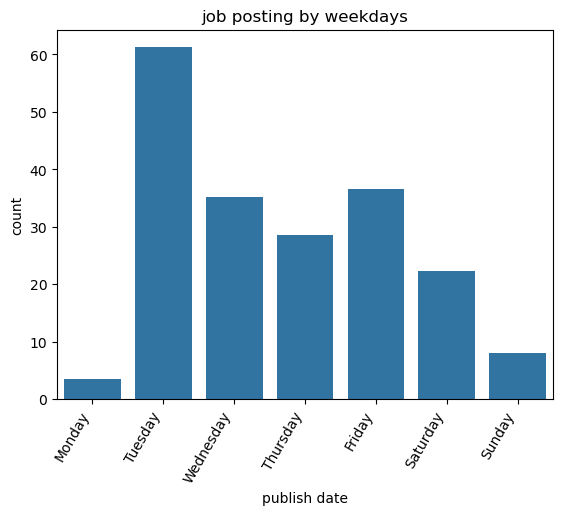

In [17]:
# Looks like the number of job postings varies by the weekday, plot them by weekdays 
jobs_over_weekday = df[['publishedAt', 'simplified_job_title']].copy()

# Extract the day of the week as 'weekday' from 'publishedAt'
jobs_over_weekday.loc[:, 'weekday'] = jobs_over_weekday['publishedAt'].dt.day_name()

# Group by weekday and job title, then count occurrences
grouped_jobs_over_weekday = jobs_over_weekday.groupby(['weekday', 'simplified_job_title']).size().reset_index(name='count')

# Reorder weekdays from Monday to Sunday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_jobs_over_weekday['weekday'] = pd.Categorical(grouped_jobs_over_weekday['weekday'], categories=ordered_days, ordered=True)

# Plot the barplot
# sns.barplot(data=grouped_jobs_over_weekday, x='weekday', y='count', hue='simplified_job_title', errorbar=None)
ax = sns.barplot(data=grouped_jobs_over_weekday, x='weekday', y='count', errorbar=None)
format_plot(ax, title='job posting by weekdays', xlabel='publish date')
plt.savefig("job_trend_weekday.png", dpi=300, bbox_inches="tight")
plt.show()

Interestingly, Job postings hit the lowest point at Monday and highest on Tuesday. Maybe there is some underlining reason, it may also due to the small sample size of the dataset.